## Homework: Week 3 - Customer Segmentation

## Part 2: Features & Scaling
- Use these features for clustering:
  - Annual Income (k$)
  - Spending Score (1-100)
- Build X with those columns.
- Standardize with StandardScaler.

### Part 3: K‑Means: Choose K (Elbow & Silhouette)
1. Elbow method:
- For $K = 1$ to $10$, fit K‑Means on scaled data and record inertia (WCSS).
- Plot WCSS vs K.
2. Silhouette score:
- For $K = 2$ to $10$, compute Silhouette Score.
- Plot Silhouette Score vs K.
3. Briefly discuss which K looks reasonable

### Part 4: Final K‑Means Model (K = 5) & Strategy
- Fit K‑Means with $K=5$ on the scaled data.
- Add the cluster labels to the original DataFrame.
- Make a scatter plot:
  - x-axis: Annual Income (k$)
  - y-axis: Spending Score (1-100)
  - Color by cluster and show centroids.
- Create a small table: for each cluster, show mean Age, Annual Income, Spending Score and cluster size.
- Write some comments for each of your 5 clusters:
  - Who is in the cluster (age, income, spending pattern)?
  - What can be the strategy for them (e.g., products, marketing focus)?

### Part 5: DBSCAN on Mall Customers
- Use the same 2 features: Annual Income (k\$) and Spending Score (1-100) (scaled).
- Run DBSCAN (try to find the optimal $\epsilon$ using the k-Distance Graph with MinPts calculated using the rule of thumb in the slide).
- Pick one $\epsilon$ in the knee area that gives a reasonable number of clusters plus maybe some noise.
- Plot customers:
  - x-axis: Income
  - y-axis: Spending Score
  - Color by DBSCAN cluster, noise as black.
- Create a small table: for each cluster, show mean Age, Annual Income, Spending Score and cluster size. Compare these clusters with those from K-Means.
- Identify some outliers and give comments about them.
- Give some comments comparing K‑Means vs DBSCAN for this dataset:
  - Which is easier to tune?
  - Which gives more interpretable segments for marketing?
  - Which would you use for this segmentation task, and why?


### Part 1: Exploration & Preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv")

df = df.drop(columns=['CustomerID'])

print(df.head())
print(df.describe())
print(df.info())

    Genre  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40
              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.000000               99.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (to

#### Simple Scatter plot to visualize

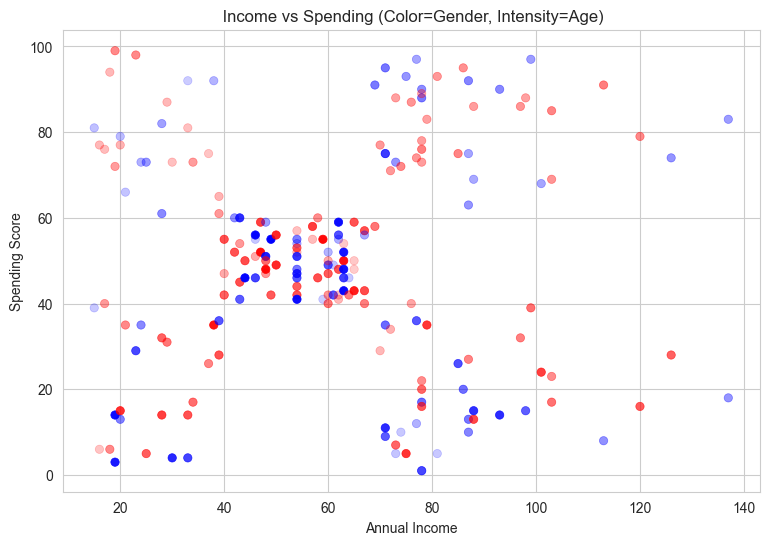

In [11]:
#convert gender to colors
gender_colors = {'Male': 'blue', 'Female': 'red'}
colors = df['Genre'].map(gender_colors)

#opacity by age
age_min = df['Age'].min()
age_max = df['Age'].max()

alphas = 0.2 + 0.8 * ((df['Age'] - age_min) / (age_max - age_min))

plt.figure(figsize=(9, 6))
plt.scatter(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    c=colors,
    alpha=alphas,
    linewidth=0.5
)

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title(' Income vs Spending (Color=Gender, Intensity=Age)')
plt.show()

### Part 2: Features & Scaling

In [12]:
from sklearn.preprocessing import StandardScaler

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Part 3: K‑Means: Choose K (Elbow & Silhouette)

Based on the silhouette scores, the optimal number of clusters is `K=5`, since the silhouette score reaches its maximum at this point. The elbow plot also supports this choice: the curve shows a substantial drop up to `K=4`, the decrease becomes much more gradual after `K=5`. Both methods converge to the conclusion that `K=5` provides the best balance between cluster cohesion and separation

### The Elbow Method

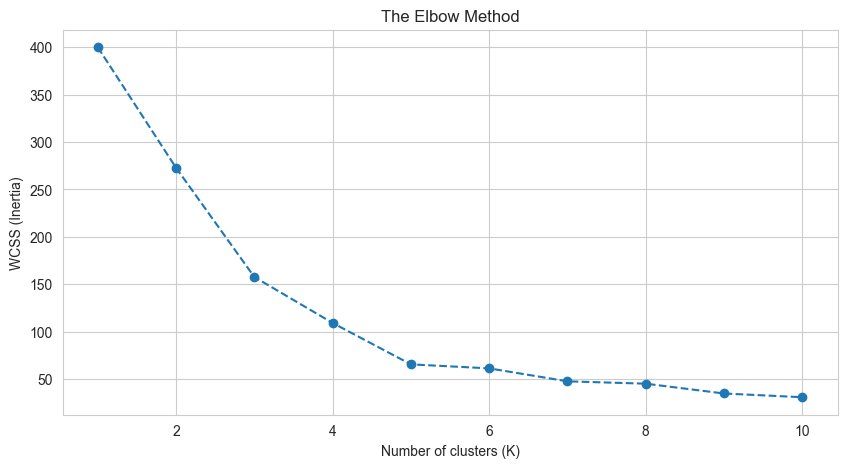

In [21]:
from sklearn.cluster import KMeans

wcss = []
k_range = range(1,11)

for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.show()

### Elbow Method using only `sklearn`

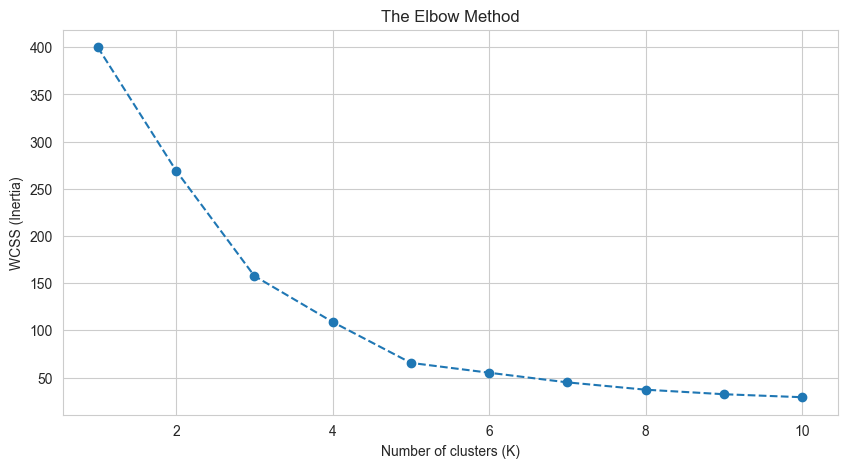

In [23]:
wcss_sk = []
k_range = range(1,11)

for k in k_range:
    km_sk = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km_sk.fit(X_scaled)
    wcss_sk.append(km_sk.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(k_range, wcss_sk, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.show()

#### Silhouette Score

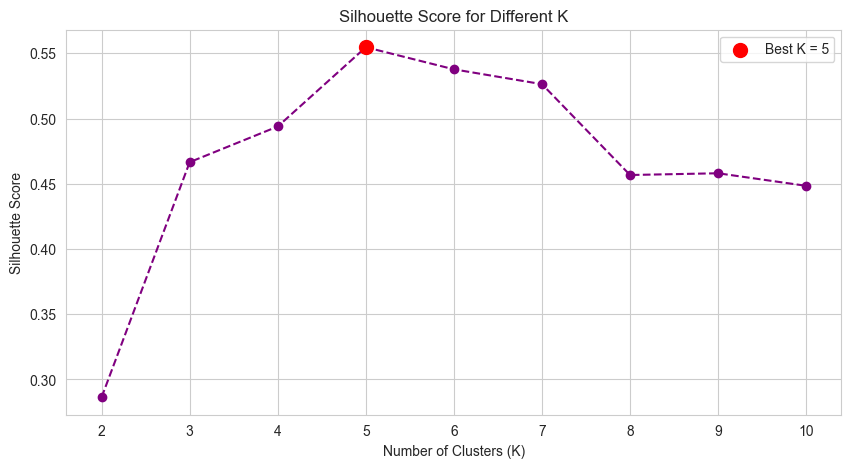

In [26]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_range = range(2,11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=10, max_iter=300, random_state=0)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--', color='purple')
plt.title("Silhouette Score for Different K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")

# Highlight the best K
best_k_idx = np.argmax(silhouette_scores)
best_k = list(k_range)[best_k_idx]
best_score = silhouette_scores[best_k_idx]

plt.scatter(best_k, best_score, color='red', s=100, zorder=5, label=f'Best K = {best_k}')
plt.legend()
plt.show()